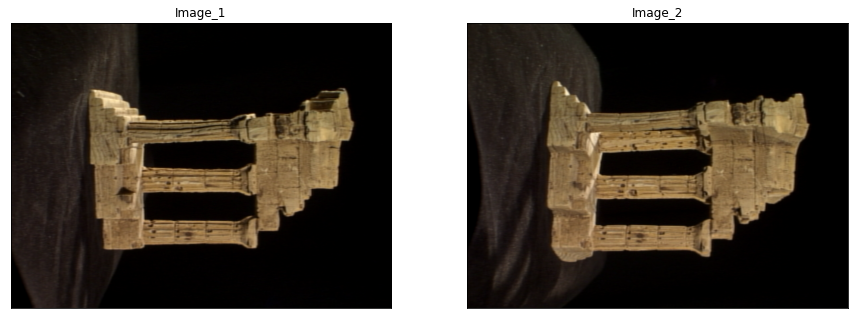

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = open(r'./Images/templeSparseRing/templeSR_par.txt', 'r')
assert f is not None

n = int(f.readline())
l = f.readline().split()
im1_fn = l[0]

K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Reading info on the second image
l = f.readline().split()
im2_fn = l[0]
K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

# Read the two images and show
im1 = cv.imread(r'Images/templeSparseRing/'+im1_fn, cv.IMREAD_COLOR)
im2 = cv.imread(r'Images/templeSparseRing/'+im2_fn, cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
# cv.namedWindow('Im')
# cv.imshow('Im', im1)
# cv.waitKey(0)
# cv.imshow('Im', im2)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig, ax = plt.subplots(1,2, sharex='all', sharey='all',figsize=(15,15))
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[0].set_title("Image_1")
ax[0].set_xticks([]) , ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(im2,cv.COLOR_BGR2RGB))
ax[1].set_title("Image_2")
ax[1].set_xticks([]) , ax[1].set_yticks([])
plt.show()
#compute P1 and P2
P1 = K1 @ np.hstack((R1,t1))
P2 = K2 @ np.hstack((R2,t2)) # P=k+[R|t]

#Compute F


In [15]:
from scipy.linalg import null_space
def skew(x):
    x = x.ravel()
    return np.array([[0, -x[2], x[1]], [x[2],0,x[0]], [-x[1],x[0],0]])

C= null_space(P1)
C = C+ np.sign(C[0,0])
e2 = P2 @ C
e2x = skew(e2)

F = e2x @ P2 @ np.linalg.pinv(P1)
print(F)

[[-4.77049508e-02 -4.96062581e-01 -1.38457580e+03]
 [ 8.77178363e-01  8.55393202e-02 -7.96921244e+02]
 [ 9.35750203e+02 -8.11343536e+02 -3.47487684e+05]]


In [16]:
x = np.array([130, 115, 1])
cv.circle(im1, (x[0], x[1]), 5, (0, 0, 255), -1)
l2 = F @ x.T
P1 = np.array([0, (l2[0]*0 + l2[2])/l2[1]]).astype(int)
P2 = np.array([500, (l2[0]*500 + l2[2])/l2[1]]).astype(int)
cv.line(im2, (P1[0],P1[1]), (P2[0],P2[1]),(255,0,0),5)

cv.namedWindow('Im')
cv.imshow('Im', im1)
cv.waitKey(0)
cv.namedWindow('Im')
cv.imshow('Im', im2)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
l2 = F @ x.T
P1 = np.array([0, (l2[0]*0 + l2[2])/l2[1]]).astype(int)
P2 = np.array([500, (l2[0]*500 + l2[2])/l2[1]]).astype(int)
cv.line(im2, (P1[0],P1[1]), (P2[0],P2[1]),(255,0,0),5)